In [1]:
import numpy as np
import scipy.integrate as spi
import sympy

%matplotlib inline

In [2]:
def simps(f,a,b,N=50):
    '''
    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]
    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    h = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [3]:
def trapz(f,a,b,N=50):
    '''
    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]
    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.
    '''
    x = np.linspace(a,b,N+1)
    y = f(x)
    y_right = y[1:] # Right endpoints
    y_left = y[:-1] # Left endpoints
    h = (b - a)/N
    T = (h/2) * np.sum(y_right + y_left)
    return T

In [4]:
def ET(a,b,N,M=-1):
    h=(b-a)/N
    return -(h**2/12)*(b-a)*M
    
def ES(a,b,N,M=-4):
    h=(b-a)/N
    return (-h**4/180)*(b-a)*M

In [5]:
def f(x):
    return np.log(1 + 2 * np.arctan(x/2))

a = 0
b = np.pi/2

In [6]:
for N in [2**i for i in range(1,20)]:
    print(f'{N:6}',f'{simps(f,a,b,N):20.15f}', f'{ES(a,b,N):e}')

     2    0.806688045030139 1.328210e-02
     4    0.808248408150699 8.301315e-04
     8    0.808384297123933 5.188322e-05
    16    0.808393970378431 3.242701e-06
    32    0.808394598853955 2.026688e-07
    64    0.808394638539953 1.266680e-08
   128    0.808394641026825 7.916751e-10
   256    0.808394641182357 4.947969e-11
   512    0.808394641192079 3.092481e-12
  1024    0.808394641192687 1.932801e-13
  2048    0.808394641192725 1.208000e-14
  4096    0.808394641192727 7.550002e-16
  8192    0.808394641192728 4.718751e-17
 16384    0.808394641192727 2.949220e-18
 32768    0.808394641192727 1.843262e-19
 65536    0.808394641192727 1.152039e-20
131072    0.808394641192727 7.200243e-22
262144    0.808394641192727 4.500152e-23
524288    0.808394641192727 2.812595e-24


In [7]:
for N in [2**i for i in range(1,20)]:
    print(f'{N:6}',f'{trapz(f,a,b,N):20.15f}', f'{ET(a,b,N):e}')

     2    0.771232244566121 8.074551e-02
     4    0.798994367254554 2.018638e-02
     8    0.806036814656589 5.046595e-03
    16    0.807804681447971 1.261649e-03
    32    0.808247119502459 3.154122e-04
    64    0.808357758780579 7.885304e-05
   128    0.808385420465264 1.971326e-05
   256    0.808392336003084 4.928315e-06
   512    0.808394064894830 1.232079e-06
  1024    0.808394497118223 3.080197e-07
  2048    0.808394605174100 7.700492e-08
  4096    0.808394632188070 1.925123e-08
  8192    0.808394638941563 4.812808e-09
 16384    0.808394640629936 1.203202e-09
 32768    0.808394641052030 3.008005e-10
 65536    0.808394641157553 7.520012e-11
131072    0.808394641183934 1.880003e-11
262144    0.808394641190529 4.700007e-12
524288    0.808394641192178 1.175002e-12


In [8]:
def f(x):
    return sympy.log(1 + 2 * sympy.atan(x/2))

x = sympy.Symbol('x')

yprime = sympy.diff(f(x),x)
yprime2 = sympy.diff(yprime,x)
yprime3 = sympy.diff(yprime2,x)
yprime4 = sympy.diff(yprime3,x)

-3*x**3/(4*(x**2/4 + 1)**4*(2*atan(x/2) + 1)) - 11*x**2/(4*(x**2/4 + 1)**4*(2*atan(x/2) + 1)**2) + 3*x/(2*(x**2/4 + 1)**3*(2*atan(x/2) + 1)) - 6*x/((x**2/4 + 1)**4*(2*atan(x/2) + 1)**3) + 2/((x**2/4 + 1)**3*(2*atan(x/2) + 1)**2) - 6/((x**2/4 + 1)**4*(2*atan(x/2) + 1)**4)

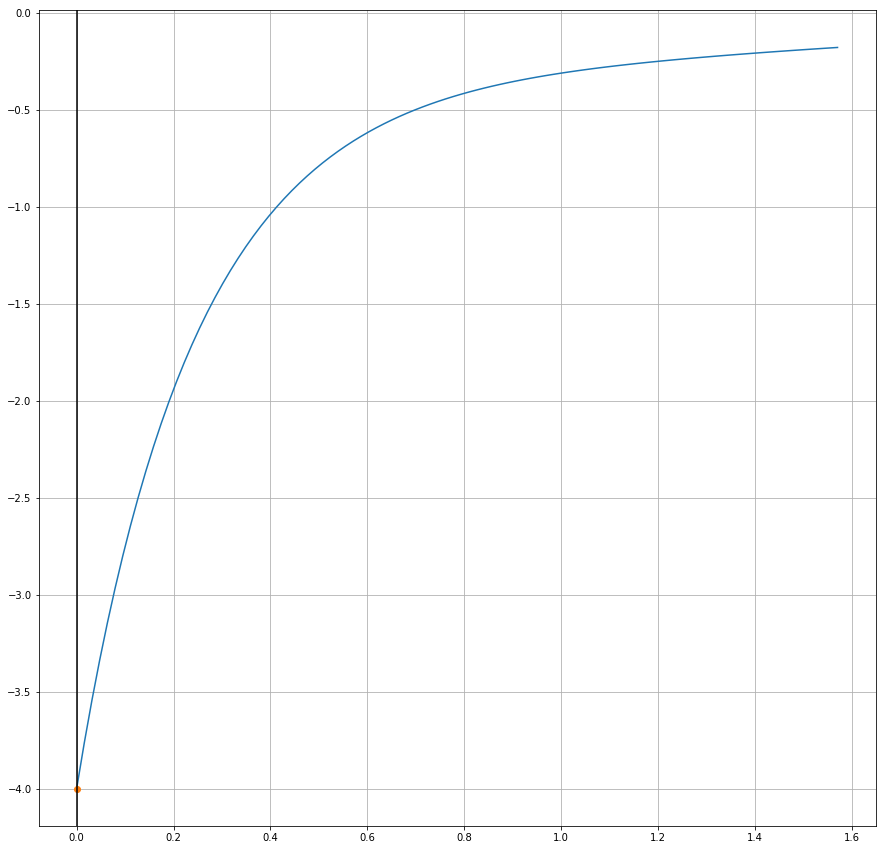

In [9]:
def show_4_derivative():
    import matplotlib.pyplot as plt

    xs = np.linspace(0,np.pi/2,100)

    ys = [yprime4.subs(x,i) for i in xs]

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(xs, ys, "-")
    ax.plot(0,yprime4.subs(x,0), "o")

    ax.grid(True, which='both')
    ax.axvline(x=0, color='k')
    fig.show()

show_4_derivative()
yprime4

-x/(2*(x**2/4 + 1)**2*(2*atan(x/2) + 1)) - 1/((x**2/4 + 1)**2*(2*atan(x/2) + 1)**2)

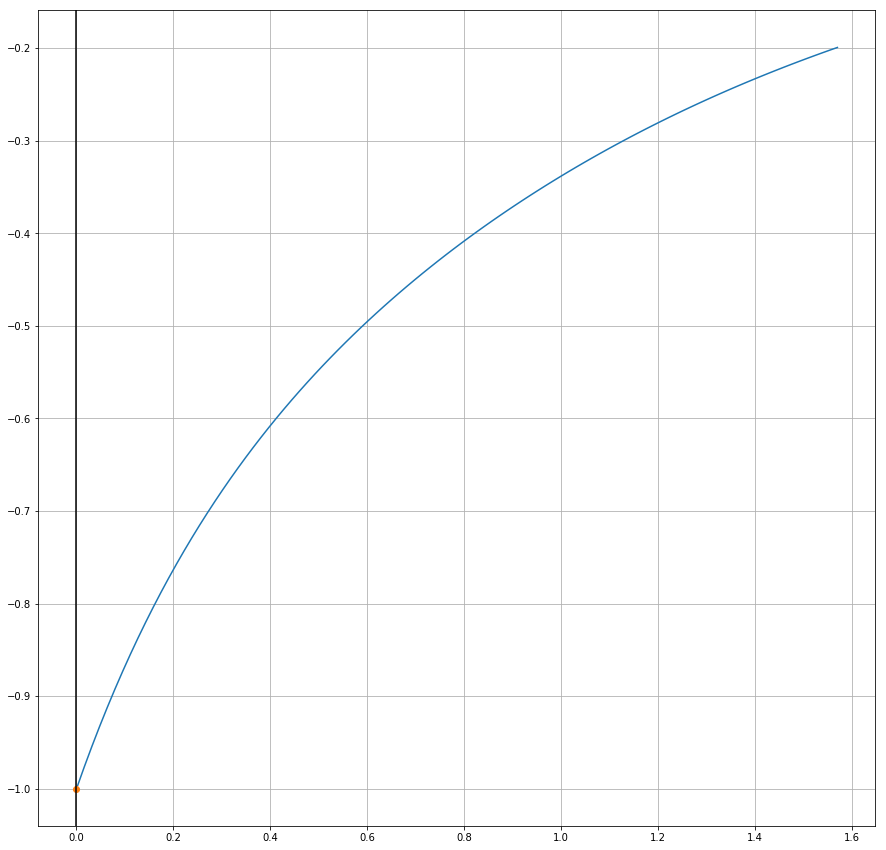

In [10]:
def show_2_derivative():
    import matplotlib.pyplot as plt

    xs = np.linspace(0,np.pi/2,100)

    ys = [yprime2.subs(x,i) for i in xs]

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(xs, ys, "-")
    ax.plot(0,yprime2.subs(x,0), "o")
    ax.grid(True, which='both')
    ax.axvline(x=0, color='k')
    fig.show()

show_2_derivative()
yprime2

In [11]:
def f(x):
    return np.log(1 + 2 * np.arctan(x/2))

xs = np.linspace(a,b,8192+1)
ys = f(xs)

ref_simps = spi.simps(ys,xs)
ref_trapz = spi.trapz(ys,xs)

print("ref_simps =", ref_simps)
print("ref_trapz =", ref_trapz)

ref_simps = 0.8083946411927274
ref_trapz = 0.808394638941563
